In [1]:
from matplotlib import pyplot as plt
import matplotlib.animation
from IPython.display import HTML
import numpy as np
import seaborn as sns
from IPython.display import clear_output

In [2]:
class Conway_Board(object):
    def __init__(self, board_array):
        self._board = board_array
        self._height, self._width = self._board.shape

    def cell_lifecycle(self, cell_coords, neighborhood):
        alive = int(neighborhood[cell_coords]) # 1, 0 :: alive, dead
        
        neighbors = np.sum(neighborhood) - alive

        if alive  and neighbors < 2:    #underpopulation
            return 0
        elif alive  and int(neighbors) in (2 ,3): #next generation
            return 1
        elif alive == 1.0  and neighbors > 3: #over population
            return 0
        elif alive == 0.0  and neighbors == 3: #reproduction
            return 1
        else:
            return 0  

    def evolve_board(self):
        
        future_board = self._board.copy()
        for row_ix, row in enumerate(self._board):
            for col_ix, cell in enumerate(row):
                left_col = max(0, col_ix - 1)
                right_col = min(col_ix + 2, self._width)
                top_row = max(0, row_ix - 1)
                bottom_row = min(row_ix + 2, self._height)
                neighborhood = self._board[top_row:bottom_row, left_col:right_col]
                cell_col_loc = 1 if col_ix > 0 else 0
                cell_row_loc = 1 if row_ix > 0 else 0
                cell_loc = cell_row_loc, cell_col_loc
                future_cell = self.cell_lifecycle(cell_loc, neighborhood)
                future_board[row_ix, col_ix] = future_cell
        self._board=future_board
        return future_board

In [3]:
WIDTH = 8
HEIGHT = 8
board = np.random.choice([0,1], WIDTH * HEIGHT).reshape((HEIGHT,WIDTH))
board = Conway_Board(board)

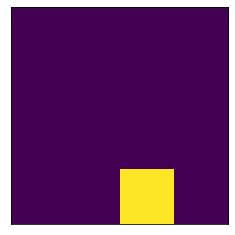

In [4]:
fig, ax = plt.subplots()
grid_plot = ax.imshow(board._board)
ax.set_xticks([])
ax.set_yticks([])

def animate(i):
    grid_plot.set_data(board.evolve_board())

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=10)
HTML(ani.to_jshtml())
